<a href="https://colab.research.google.com/github/sshee0123/Airpotal_crawling/blob/main/DeepLearning/deep05_CNN_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms

# 파이토치 디버깅...
import pdb

In [2]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda', index=0)

In [3]:
num_epoch = 5
num_classes = 10
batch_size = 100
learning_rate = 0.001 

In [5]:
# 1단계 로딩과정...물지적인 위치 지정함
'''
ToTensor() 3가지 작업
1. 타입을 파이토치에서 사용할 수 있는 tensor() 타입으로 변경..
2. 32x32x3 이미지를 3x32x32
3. 스케일링... /255로 나눠준다.
'''
train_dataset = torchvision.datasets.MNIST(root = '../../data',
                                           train = True,
                                           transform = transforms.ToTensor(),
                                           download = True)
test_dataset = torchvision.datasets.MNIST(root = '../../data',
                                          train = False,
                                          transform = transforms.ToTensor())

# 2단계 로딩과정...모델에 데이타를 쪼개서 로딩하는 과정...batch_size
train_loader = torch.utils.data.DataLoader(dataset = train_dataset,
                                           batch_size = batch_size,
                                           shuffle = True)
test_loader = torch.utils.data.DataLoader(dataset = test_dataset,
                                           batch_size = batch_size,
                                           shuffle = False)

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ../../data/MNIST/raw/train-images-idx3-ubyte.gz to ../../data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ../../data/MNIST/raw/train-labels-idx1-ubyte.gz to ../../data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ../../data/MNIST/raw/t10k-images-idx3-ubyte.gz to ../../data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ../../data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ../../data/MNIST/raw



In [16]:
from torch.nn.modules.activation import ReLU
class ConvNet(nn.Module):
    def __init__(self, num_classes):
        super(ConvNet, self).__init__()
        self.layer1 = nn.Sequential(
            # 2차원이라 2d
            nn.Conv2d(1, 16, kernel_size=5, stride = 1, padding = 2),
            # 28 x 28 x 1 -> 28 x 28 x 16
            nn.ReLU()
            )
        self.layer2 = nn.MaxPool2d(kernel_size = 2, stride = 2)
        self.layer3 = nn.Sequential(
            # layer1 의 출력값이 입력값이 됨.
            nn.Conv2d(16, 32, kernel_size=5, stride = 1, padding = 2),
            nn.ReLU()
        )
        self.layer4 = nn.MaxPool2d(kernel_size = 2, stride = 2)

        # 1차원으로 펼쳐준다. flatten -> FCL
        self.layer5 = nn.Linear(7*7*32, num_classes)

    def forward(self,x):
      # 2. pdb.set_trace()
       pdb.set_trace()
       out = self.layer1(x)
       out = self.layer2(out)
       out = self.layer3(out)
       out = self.layer4(out)
       
       # 펼칠 때 reshape 사용
       out = out.reshape(out.size(0), -1) # 2차원을 1차원으로 펼친 결과물
       out = self.layer5(out)
       return out

Sequential()  

입력 데이터 -> hidden layer -> 출력 데이터

torch.nn.Conv2d(in_channels, out_channels, kernel_size, stride=1, padding=0, dilation=1, groups=1, bias=True, padding_mode='zeros', device=None, dtype=None)[링크 텍스트](https://)

In [7]:
model = ConvNet(num_classes).to(device)
loss_function = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate)

In [17]:
model.train() 
total_step = len(train_loader)
for epoch in range(num_epoch): # 총 5회 학습
  for i, (images, label) in enumerate(train_loader): # 100개씩 압축파일이 넘어감.
    images = images.to(device) # gpu 서버로 돌린다고 모델에 알려준다.
    labels = label.to(device)
    
    # 1. set_trace()
    # pdb.set_trace()

    outputs = model(images) # forward 로 감.
    loss = loss_function(outputs, labels)
    optimizer.step()

    if (i+1) % 100 ==0:
      print('Epoch [{}/{}], Step[{}/{}], Loss {:.3f}'.format(epoch+1, num_epoch, i+1, total_step, loss.item()))

Epoch [1/5], Step[100/600], Loss 2.308
Epoch [1/5], Step[200/600], Loss 2.290
Epoch [1/5], Step[300/600], Loss 2.308
Epoch [1/5], Step[400/600], Loss 2.305
Epoch [1/5], Step[500/600], Loss 2.304
Epoch [1/5], Step[600/600], Loss 2.300
Epoch [2/5], Step[100/600], Loss 2.304
Epoch [2/5], Step[200/600], Loss 2.298
Epoch [2/5], Step[300/600], Loss 2.299
Epoch [2/5], Step[400/600], Loss 2.299
Epoch [2/5], Step[500/600], Loss 2.298
Epoch [2/5], Step[600/600], Loss 2.303
Epoch [3/5], Step[100/600], Loss 2.301
Epoch [3/5], Step[200/600], Loss 2.302
Epoch [3/5], Step[300/600], Loss 2.290
Epoch [3/5], Step[400/600], Loss 2.305
Epoch [3/5], Step[500/600], Loss 2.304
Epoch [3/5], Step[600/600], Loss 2.305
Epoch [4/5], Step[100/600], Loss 2.304
Epoch [4/5], Step[200/600], Loss 2.298
Epoch [4/5], Step[300/600], Loss 2.308
Epoch [4/5], Step[400/600], Loss 2.291
Epoch [4/5], Step[500/600], Loss 2.304
Epoch [4/5], Step[600/600], Loss 2.296
Epoch [5/5], Step[100/600], Loss 2.301
Epoch [5/5], Step[200/600

In [10]:
# 모델에게 evaluation 임을 알려주는 기능... mode 바꾼다...
# -> 학습 속도 빨라진다.
model.eval() 
with torch.no_grad(): 
    correct = 0
    total = 0

    for images, labels in test_loader:
      images = images.to(device)
      labels = labels.to(device)

      outputs = model(images)
      _, predicted = torch.max(outputs.data, 1)
      total += labels.size(0)
      correct += (predicted == labels).sum().item()

    print('Test Accuracy of the model on the 10000 test images: {} %'.format(100 * correct / total))

# Save the model checkpoint
torch.save(model.state_dict(), 'model.ckpt')

Test Accuracy of the model on the 10000 test images: 8.07 %


Label: 1
Prediction: 4


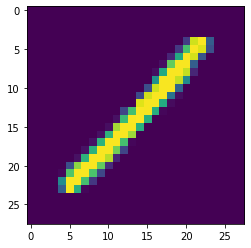

In [11]:
import numpy as np
import matplotlib.pyplot as plt

idx= 12
image = np.array(images[idx,0].detach().cpu()) 
label = labels[idx].item()
pred = predicted[idx].item()

plt.imshow(image* 255)
print("Label:", label)
print("Prediction:", pred)